In [68]:
# !pip install gensim

In [72]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
import multiprocessing

# Data

In [42]:
ls /home/luongnv/Documents/DataScience/Project-Tripi/data/public/

music-session/  spud.zip  yoochoose-data/  yoochoose-data.7z


In [43]:
DATA_PATH = '/home/luongnv/Documents/DataScience/Project-Tripi/data/public/music-session/spud.sqlite'

In [44]:
import sqlite3

spud = sqlite3.connect(DATA_PATH)
cur = spud.cursor()
cur.execute('SELECT name FROM sqlite_master WHERE type="table";')
cur.fetchall()

# # output
# [('artists',),
#  ('sqlite_sequence',),
#  ('albums',),
#  ('tracks',),
#  ('lastfmusers',),
#  ('lastfmplaylists',),
#  ('lastfmplayliststracks',),
#  ('lastfmtracklistens',)]

[('artists',),
 ('sqlite_sequence',),
 ('albums',),
 ('tracks',),
 ('lastfmusers',),
 ('lastfmplaylists',),
 ('lastfmplayliststracks',),
 ('lastfmtracklistens',)]

> Thực hiện join các bảng tại các trường tương ứng của từng bảng:

In [48]:
dataset = pd.read_sql('SELECT \
    l.user AS user_id, \
    l.date AS listen_date, \
    t.trackid AS track_id, \
    t.title AS track_title, \
    a.artistid AS artist_id, \
    a.name AS artist_name, \
    m.albumid AS album_id, \
    m.name AS album_name, \
    m.artist AS album_artist \
  FROM lastfmtracklistens AS l \
  INNER JOIN tracks t ON l.track = t.trackid \
  INNER JOIN artists a ON t.artist = a.artistid \
  INNER JOIN albums m ON t.album = m.albumid;', con=spud)

print(dataset.shape)
  
#   # output
#   (3480460, 9)

(3480460, 9)


In [49]:
dataset.sample(10)

,user_id,listen_date,track_id,track_title,artist_id,artist_name,album_id,album_name,album_artist
3157309,7662,2010-06-08 04:24:43+00:00,5338,My Immortal,29,Evanescence,3984,Fallen,29
3420049,7664,2013-12-09 18:55:07+00:00,693170,Voice in the Rose,96368,Amor de Días,274110,The House at Sea (Bonus Track Version),96368
2375785,7633,2010-08-11 12:55:48+00:00,1691,Gates Of Babylon,892,Rainbow,1313,Anthology,892
936292,7600,2011-02-10 06:04:42+00:00,499186,Someone New,78906,Scala,223827,On The Rocks - French Version,78906
1818465,1880,2010-08-16 16:21:37+00:00,11021,Let's Stay Together,3792,Al Green,7822,Let's Stay Together,3792
3212583,7664,2006-12-11 09:39:37+00:00,195301,Massive Nights,10823,The Hold Steady,108990,Boys And Girls In America,10823
2055813,7626,2009-07-30 12:08:24+00:00,364016,Żywioły,2220,The Farben Lehre,162091,Best of the Best,2220
1991509,7624,2013-07-28 19:30:38+00:00,512176,New Colour,11404,Lone,227272,Galaxy Garden,11404
1900457,7623,2011-03-20 18:21:43+00:00,12502,Promise,4893,Akira Yamaoka,8925,The Best of Silent Hill,4893
2427016,7633,2013-02-22 17:12:04+00:00,28597,Am I Wry? No,2496,Mew,20883,Am I wry No?,2496


> Thực hiện format lại trường datetime và sắp xếp theo chiều thời gian:

In [52]:
dataset['listen_date'] = dataset['listen_date'].apply(lambda s: datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S+00:00'))
dataset.sort_values('listen_date', ascending=True, inplace=True)

> Phân bố dữ liệu tại trường track_id:

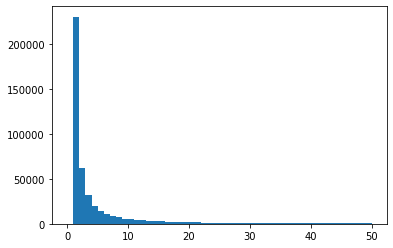

In [55]:
_ = plt.hist(dataset["track_id"].value_counts().values, bins=50, range=(0, 50))

> Lấy track_id sau từng user_id cụ thể (về thực tế không cần quan tâm user là ai)

In [59]:
start = time.time()
sessions = []
for user_id, df in dataset.groupby('user_id', sort=False):
    session = []
    for index, row in df.iterrows():
        session.append(str(row['track_id']))
  
    sessions.append(session)
    
print("Took {}'s".format(time.time() - start))

# # output
# Took 378.7666292190552's

print(sessions[0])
# # output
# ['422042', '51739', '422041', '422040', '243084', '53998', '422039', '138183', '422038', '58410', '...']

Took 266.0877470970154's
['422042', '51739', '422041', '422040', '243084', '53998', '422039', '138183', '422038', '58410', '246234', '67', '422037', '69213', '2837', '422036', '272897', '98360', '20123', '67711', '254285', '155973', '4355', '19670', '273494', '108731', '4479', '34279', '12396', '73021', '422035', '38722', '28806', '13714', '175094', '22451', '422034', '84818', '22268', '9358', '243112', '422033', '12543', '273491', '61347', '41470', '422032', '157082', '36341', '22549', '148561', '422057', '366764', '16935', '422056', '45492', '415572', '15274', '142732', '41', '172893', '47264', '422055', '295517', '422054', '422053', '362738', '203607', '134691', '422052', '316507', '422051', '279676', '422050', '422049', '54249', '369602', '55878', '63706', '68802', '68802', '68802', '68802', '68802', '422048', '422047', '422046', '422045', '224397', '422044', '422043', '44486', '422079', '422078', '188414', '80752', '104081', '422077', '422059', '247401', '422076', '45505', '422075

> Tách thành các nhóm n-gram theo n track_id liên tiếp được nghe bời cùng 1 user

In [60]:
def make_ngrams(session, n=5):
    return list(zip(*[session[i:] for i in range(n)]))

In [61]:
make_ngrams(sessions[0], n=5)

# # output
# [('422042', '51739', '422041', '422040', '243084'),
#  ('51739', '422041', '422040', '243084', '53998'),
#  ('422041', '422040', '243084', '53998', '422039'),
#  ('422040', '243084', '53998', '422039', '138183'),
#  ('243084', '53998', '422039', '138183', '422038'),
#  ('53998', '422039', '138183', '422038', '58410'),
#  ('422039', '138183', '422038', '58410', '246234'),
#  ('138183', '422038', '58410', '246234', '67'),
#  ....]

[('422042', '51739', '422041', '422040', '243084'),
 ('51739', '422041', '422040', '243084', '53998'),
 ('422041', '422040', '243084', '53998', '422039'),
 ('422040', '243084', '53998', '422039', '138183'),
 ('243084', '53998', '422039', '138183', '422038'),
 ('53998', '422039', '138183', '422038', '58410'),
 ('422039', '138183', '422038', '58410', '246234'),
 ('138183', '422038', '58410', '246234', '67'),
 ('422038', '58410', '246234', '67', '422037'),
 ('58410', '246234', '67', '422037', '69213'),
 ('246234', '67', '422037', '69213', '2837'),
 ('67', '422037', '69213', '2837', '422036'),
 ('422037', '69213', '2837', '422036', '272897'),
 ('69213', '2837', '422036', '272897', '98360'),
 ('2837', '422036', '272897', '98360', '20123'),
 ('422036', '272897', '98360', '20123', '67711'),
 ('272897', '98360', '20123', '67711', '254285'),
 ('98360', '20123', '67711', '254285', '155973'),
 ('20123', '67711', '254285', '155973', '4355'),
 ('67711', '254285', '155973', '4355', '19670'),
 ('2542

> Thực hiện tạo 1 list các list chứa các track_id đã nghe trong 1 session_id

In [62]:
gen_sessions = []
for session in sessions:
    gen_sessions.extend(make_ngrams(session, 11))

print(len(gen_sessions))
# # output
# 3479560

3479560


> Logging model trước lúc training:

In [63]:
import logging
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

> Training mô hình

In [73]:
model = Word2Vec(
    gen_sessions,
    size=32,            # Vector dimensions
    window=5,           # Sliding window size
    sg=1,               # Use the skip gram model
    hs=0,               # Use negative sampling
    negative=20,        # Number of negative samples
    ns_exponent=-0.5,   # Unigram distribution's exponent
    sample=1e-4,        # Subsampling rate
    workers=(2 * multiprocessing.cpu_count() + 1),
    iter=5
)
model.save("music_session.model")

2020-11-23 16:21:19,880 - gensim.models.word2vec - INFO - collecting all words and their counts
2020-11-23 16:21:19,883 - gensim.models.word2vec - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-23 16:21:19,963 - gensim.models.word2vec - INFO - PROGRESS: at sentence #10000, processed 110000 words, keeping 7580 word types
2020-11-23 16:21:20,014 - gensim.models.word2vec - INFO - PROGRESS: at sentence #20000, processed 220000 words, keeping 12915 word types
2020-11-23 16:21:20,035 - gensim.models.word2vec - INFO - PROGRESS: at sentence #30000, processed 330000 words, keeping 18343 word types
2020-11-23 16:21:20,053 - gensim.models.word2vec - INFO - PROGRESS: at sentence #40000, processed 440000 words, keeping 22019 word types
2020-11-23 16:21:20,070 - gensim.models.word2vec - INFO - PROGRESS: at sentence #50000, processed 550000 words, keeping 27140 word types
2020-11-23 16:21:20,088 - gensim.models.word2vec - INFO - PROGRESS: at sentence #60000, processe

2020-11-23 16:21:20,955 - gensim.models.word2vec - INFO - PROGRESS: at sentence #590000, processed 6490000 words, keeping 234788 word types
2020-11-23 16:21:20,971 - gensim.models.word2vec - INFO - PROGRESS: at sentence #600000, processed 6600000 words, keeping 235962 word types
2020-11-23 16:21:20,989 - gensim.models.word2vec - INFO - PROGRESS: at sentence #610000, processed 6710000 words, keeping 236505 word types
2020-11-23 16:21:21,005 - gensim.models.word2vec - INFO - PROGRESS: at sentence #620000, processed 6820000 words, keeping 237657 word types
2020-11-23 16:21:21,023 - gensim.models.word2vec - INFO - PROGRESS: at sentence #630000, processed 6930000 words, keeping 238478 word types
2020-11-23 16:21:21,038 - gensim.models.word2vec - INFO - PROGRESS: at sentence #640000, processed 7040000 words, keeping 239665 word types
2020-11-23 16:21:21,052 - gensim.models.word2vec - INFO - PROGRESS: at sentence #650000, processed 7150000 words, keeping 240745 word types
2020-11-23 16:21:21,

2020-11-23 16:21:21,995 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1180000, processed 12980000 words, keeping 273700 word types
2020-11-23 16:21:22,010 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1190000, processed 13090000 words, keeping 277356 word types
2020-11-23 16:21:22,026 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1200000, processed 13200000 words, keeping 278713 word types
2020-11-23 16:21:22,042 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1210000, processed 13310000 words, keeping 281399 word types
2020-11-23 16:21:22,057 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1220000, processed 13420000 words, keeping 282417 word types
2020-11-23 16:21:22,073 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1230000, processed 13530000 words, keeping 284159 word types
2020-11-23 16:21:22,088 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1240000, processed 13640000 words, keeping 286223 word types
2020-1

2020-11-23 16:21:22,985 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1760000, processed 19360000 words, keeping 322701 word types
2020-11-23 16:21:23,004 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1770000, processed 19470000 words, keeping 325563 word types
2020-11-23 16:21:23,022 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1780000, processed 19580000 words, keeping 327496 word types
2020-11-23 16:21:23,041 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1790000, processed 19690000 words, keeping 329198 word types
2020-11-23 16:21:23,060 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1800000, processed 19800000 words, keeping 330470 word types
2020-11-23 16:21:23,078 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1810000, processed 19910000 words, keeping 330757 word types
2020-11-23 16:21:23,099 - gensim.models.word2vec - INFO - PROGRESS: at sentence #1820000, processed 20020000 words, keeping 331144 word types
2020-1

2020-11-23 16:21:24,085 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2340000, processed 25740000 words, keeping 376850 word types
2020-11-23 16:21:24,101 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2350000, processed 25850000 words, keeping 377505 word types
2020-11-23 16:21:24,123 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2360000, processed 25960000 words, keeping 378182 word types
2020-11-23 16:21:24,141 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2370000, processed 26070000 words, keeping 378753 word types
2020-11-23 16:21:24,156 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2380000, processed 26180000 words, keeping 379356 word types
2020-11-23 16:21:24,172 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2390000, processed 26290000 words, keeping 379958 word types
2020-11-23 16:21:24,191 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2400000, processed 26400000 words, keeping 380332 word types
2020-1

2020-11-23 16:21:25,021 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2920000, processed 32120000 words, keeping 419393 word types
2020-11-23 16:21:25,036 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2930000, processed 32230000 words, keeping 419441 word types
2020-11-23 16:21:25,050 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2940000, processed 32340000 words, keeping 419489 word types
2020-11-23 16:21:25,066 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2950000, processed 32450000 words, keeping 419711 word types
2020-11-23 16:21:25,081 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2960000, processed 32560000 words, keeping 419742 word types
2020-11-23 16:21:25,096 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2970000, processed 32670000 words, keeping 419780 word types
2020-11-23 16:21:25,112 - gensim.models.word2vec - INFO - PROGRESS: at sentence #2980000, processed 32780000 words, keeping 420154 word types
2020-1

2020-11-23 16:21:27,607 - gensim.models.word2vec - INFO - effective_min_count=5 leaves 38275037 word corpus (99% of original 38275160, drops 123)
2020-11-23 16:21:28,768 - gensim.models.word2vec - INFO - deleting the raw counts dictionary of 459262 items
2020-11-23 16:21:28,776 - gensim.models.word2vec - INFO - sample=0.0001 downsamples 27 most-common words
2020-11-23 16:21:28,777 - gensim.models.word2vec - INFO - downsampling leaves estimated 38139079 word corpus (99.6% of prior 38275037)
2020-11-23 16:21:29,671 - gensim.models.base_any2vec - INFO - estimated required memory for 459211 words and 32 dimensions: 347163516 bytes
2020-11-23 16:21:29,672 - gensim.models.word2vec - INFO - resetting layer weights
2020-11-23 16:22:58,590 - gensim.models.base_any2vec - INFO - training model with 9 workers on 459211 vocabulary and 32 features, using sg=1 hs=0 sample=0.0001 negative=20 window=5
2020-11-23 16:22:59,810 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 0.03% examples, 8

2020-11-23 16:23:55,817 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 15.67% examples, 104845 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:23:57,000 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 15.94% examples, 104435 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:23:58,007 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 16.17% examples, 104179 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:23:59,064 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 16.54% examples, 104673 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:24:00,181 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 16.85% examples, 104723 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:24:01,207 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 17.16% examples, 104922 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:24:02,240 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 17.48% examples, 105105 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:24:58,501 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 33.78% examples, 107767 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:24:59,519 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 34.09% examples, 107851 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:25:00,640 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 34.43% examples, 107925 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:25:01,788 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 34.72% examples, 107813 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:25:02,958 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 35.08% examples, 107922 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:25:04,152 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 35.40% examples, 107852 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:25:05,205 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 35.71% examples, 107902 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:26:00,899 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 52.35% examples, 109868 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:26:01,931 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 52.64% examples, 109849 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:26:02,960 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 52.95% examples, 109887 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:26:04,008 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 53.24% examples, 109859 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:26:05,058 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 53.55% examples, 109884 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:26:06,163 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 53.89% examples, 109930 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:26:07,174 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 54.23% examples, 110030 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:27:04,211 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 68.52% examples, 106745 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:27:05,247 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 68.81% examples, 106742 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:27:06,265 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 69.12% examples, 106787 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:27:07,306 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 69.46% examples, 106862 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:27:08,373 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 69.78% examples, 106886 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:27:09,444 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 70.09% examples, 106908 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:27:10,455 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 70.46% examples, 107034 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:28:06,416 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 86.84% examples, 107534 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:28:07,498 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 87.12% examples, 107514 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:28:08,521 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 87.41% examples, 107513 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:28:09,595 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 87.72% examples, 107528 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:28:10,741 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 88.01% examples, 107486 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:28:11,743 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 88.30% examples, 107493 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:28:12,836 - gensim.models.base_any2vec - INFO - EPOCH 1 - PROGRESS: at 88.61% examples, 107501 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:29:00,079 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 1.33% examples, 94516 words/s, in_qsize 16, out_qsize 1
2020-11-23 16:29:01,151 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 1.67% examples, 98835 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:29:02,194 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 2.01% examples, 102410 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:29:03,274 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 2.30% examples, 102345 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:29:04,303 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 2.59% examples, 102829 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:29:05,398 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 2.90% examples, 103518 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:29:06,435 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 3.19% examples, 103737 words/s, in_qsize 17, out_qsize 0
2020-11-

2020-11-23 16:30:02,703 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 18.78% examples, 105677 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:30:03,710 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 18.97% examples, 105150 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:30:04,919 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 19.28% examples, 105047 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:30:06,103 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 19.54% examples, 104706 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:30:07,186 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 19.85% examples, 104796 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:30:08,220 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 20.12% examples, 104681 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:30:09,244 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 20.43% examples, 104852 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:31:05,971 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 36.52% examples, 106412 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:31:07,273 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 36.78% examples, 106121 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:31:08,284 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 37.07% examples, 106143 words/s, in_qsize 17, out_qsize 1
2020-11-23 16:31:09,450 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 37.41% examples, 106187 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:31:10,710 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 37.70% examples, 106012 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:31:11,795 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 38.06% examples, 106195 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:31:12,919 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 38.38% examples, 106200 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:32:08,185 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 54.16% examples, 107071 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:32:09,188 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 54.49% examples, 107187 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:32:10,249 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 54.76% examples, 107117 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:32:11,378 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 55.07% examples, 107112 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:32:12,395 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 55.41% examples, 107218 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:32:13,480 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 55.70% examples, 107187 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:32:14,568 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 56.04% examples, 107254 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:33:11,398 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 71.84% examples, 107070 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:33:12,433 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 72.05% examples, 106951 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:33:13,434 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 72.34% examples, 106962 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:33:14,470 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 72.65% examples, 106997 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:33:15,499 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 72.96% examples, 107035 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:33:16,599 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 73.25% examples, 107004 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:33:17,642 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 73.54% examples, 106997 words/s, in_qsize 18, out_qsize 0

2020-11-23 16:34:13,330 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 89.27% examples, 106796 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:34:14,360 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 89.55% examples, 106796 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:34:15,466 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 89.81% examples, 106740 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:34:16,750 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 90.15% examples, 106718 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:34:17,820 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 90.44% examples, 106705 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:34:19,004 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 90.75% examples, 106685 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:34:20,018 - gensim.models.base_any2vec - INFO - EPOCH 2 - PROGRESS: at 91.07% examples, 106721 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:35:07,484 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 4.05% examples, 101693 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:35:08,486 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 4.34% examples, 102192 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:35:09,497 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 4.70% examples, 104319 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:35:10,756 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 4.96% examples, 102627 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:35:11,789 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 5.30% examples, 103849 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:35:13,162 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 5.67% examples, 103727 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:35:14,198 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 6.03% examples, 105206 words/s, in_qsize 17, out_qsize 0
2020-1

2020-11-23 16:36:10,205 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 21.16% examples, 103880 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:36:11,237 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 21.47% examples, 104014 words/s, in_qsize 17, out_qsize 1
2020-11-23 16:36:12,245 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 21.84% examples, 104442 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:36:13,283 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 22.15% examples, 104583 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:36:14,362 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 22.52% examples, 104912 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:36:15,416 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 22.83% examples, 105025 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:36:16,421 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 23.17% examples, 105318 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:37:12,710 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 39.32% examples, 107081 words/s, in_qsize 18, out_qsize 1
2020-11-23 16:37:13,820 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 39.63% examples, 107089 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:37:14,824 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 39.92% examples, 107106 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:37:15,830 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 40.20% examples, 107122 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:37:17,005 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 40.49% examples, 107012 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:37:18,100 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 40.81% examples, 107032 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:37:19,186 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 41.04% examples, 106853 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:38:14,862 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 56.17% examples, 106057 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:38:16,174 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 56.45% examples, 105914 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:38:17,182 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 56.79% examples, 106027 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:38:18,186 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 57.08% examples, 106044 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:38:19,218 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 57.34% examples, 106000 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:38:20,216 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 57.63% examples, 106019 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:38:21,226 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 57.94% examples, 106081 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:39:17,415 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 74.17% examples, 107012 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:39:18,477 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 74.45% examples, 106998 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:39:19,800 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 74.85% examples, 107029 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:39:20,859 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 75.16% examples, 107054 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:39:21,861 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 75.45% examples, 107064 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:39:23,203 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 75.76% examples, 106977 words/s, in_qsize 17, out_qsize 1
2020-11-23 16:39:24,206 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 76.13% examples, 107097 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:40:20,892 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 93.21% examples, 108143 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:40:21,970 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 93.55% examples, 108183 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:40:23,000 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 93.86% examples, 108209 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:40:24,032 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 94.15% examples, 108204 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:40:25,038 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 94.41% examples, 108177 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:40:26,060 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 94.73% examples, 108206 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:40:27,135 - gensim.models.base_any2vec - INFO - EPOCH 3 - PROGRESS: at 95.07% examples, 108246 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:41:13,968 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 8.91% examples, 112686 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:41:15,050 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 9.22% examples, 112624 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:41:16,182 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 9.56% examples, 112701 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:41:17,244 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 9.93% examples, 113305 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:41:18,297 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 10.21% examples, 113034 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:41:19,326 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 10.53% examples, 113139 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:41:20,337 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 10.82% examples, 113019 words/s, in_qsize 17, out_qsize 0
202

2020-11-23 16:42:17,274 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 26.96% examples, 110218 words/s, in_qsize 16, out_qsize 1
2020-11-23 16:42:18,320 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 27.30% examples, 110374 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:42:19,457 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 27.59% examples, 110212 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:42:20,509 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 27.98% examples, 110563 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:42:21,552 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 28.27% examples, 110509 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:42:22,770 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 28.53% examples, 110160 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:42:23,813 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 28.84% examples, 110211 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:43:20,740 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 45.30% examples, 110363 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:43:21,921 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 45.59% examples, 110234 words/s, in_qsize 18, out_qsize 1
2020-11-23 16:43:22,992 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 45.93% examples, 110308 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:43:24,182 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 46.19% examples, 110113 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:43:25,195 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 46.42% examples, 109980 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:43:26,208 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 46.71% examples, 109971 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:43:27,257 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 46.97% examples, 109877 words/s, in_qsize 16, out_qsize 1

2020-11-23 16:44:24,600 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 63.64% examples, 110229 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:44:25,686 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 63.98% examples, 110275 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:44:26,806 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 64.24% examples, 110170 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:44:27,825 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 64.60% examples, 110293 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:44:29,114 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 64.94% examples, 110239 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:44:30,174 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 65.31% examples, 110341 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:44:31,353 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 65.65% examples, 110341 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:45:27,314 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 81.32% examples, 109716 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:45:28,448 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 81.61% examples, 109665 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:45:29,491 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 81.98% examples, 109755 words/s, in_qsize 18, out_qsize 1
2020-11-23 16:45:30,598 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 82.26% examples, 109714 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:45:31,654 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 82.53% examples, 109659 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:45:32,802 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 82.97% examples, 109814 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:45:33,879 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 83.26% examples, 109783 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:46:29,393 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 8 more threads
2020-11-23 16:46:29,520 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 7 more threads
2020-11-23 16:46:29,535 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 6 more threads
2020-11-23 16:46:29,622 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 5 more threads
2020-11-23 16:46:29,644 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 4 more threads
2020-11-23 16:46:29,673 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 3 more threads
2020-11-23 16:46:29,687 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-11-23 16:46:29,751 - gensim.models.base_any2vec - INFO - EPOCH 4 - PROGRESS: at 99.98% examples, 110190 words/s, in_qsize 1, out_qsize 1
2020-11-23 16:46:2

2020-11-23 16:47:22,978 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 14.00% examples, 100845 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:47:24,368 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 14.26% examples, 100109 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:47:25,458 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 14.55% examples, 100124 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:47:26,471 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 14.81% examples, 100099 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:47:27,662 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 15.10% examples, 99939 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:47:28,664 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 15.39% examples, 100107 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:47:29,726 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 15.65% examples, 100001 words/s, in_qsize 17, out_qsize 0


2020-11-23 16:48:27,261 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 31.58% examples, 102890 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:48:28,314 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 31.85% examples, 102819 words/s, in_qsize 16, out_qsize 1
2020-11-23 16:48:29,474 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 32.18% examples, 102909 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:48:30,527 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 32.52% examples, 103088 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:48:31,544 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 32.81% examples, 103130 words/s, in_qsize 18, out_qsize 1
2020-11-23 16:48:32,546 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 33.10% examples, 103184 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:48:33,578 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 33.46% examples, 103454 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:49:29,316 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 48.85% examples, 104132 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:49:30,317 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 49.27% examples, 104440 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:49:31,773 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 49.56% examples, 104209 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:49:32,809 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 49.87% examples, 104274 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:49:33,811 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 50.21% examples, 104413 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:49:35,165 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 50.52% examples, 104297 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:49:36,176 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 50.81% examples, 104321 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:50:33,566 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 66.09% examples, 103754 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:50:34,721 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 66.35% examples, 103673 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:50:35,816 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 66.59% examples, 103577 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:50:37,005 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 66.90% examples, 103564 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:50:38,138 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 67.19% examples, 103535 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:50:39,174 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 67.45% examples, 103505 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:50:40,271 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 67.77% examples, 103531 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:51:36,786 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 82.71% examples, 103096 words/s, in_qsize 18, out_qsize 0
2020-11-23 16:51:37,820 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 82.97% examples, 103074 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:51:39,019 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 83.26% examples, 103030 words/s, in_qsize 17, out_qsize 1
2020-11-23 16:51:40,029 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 83.70% examples, 103207 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:51:41,036 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 84.30% examples, 103363 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:51:42,134 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 84.67% examples, 103359 words/s, in_qsize 17, out_qsize 0
2020-11-23 16:51:43,154 - gensim.models.base_any2vec - INFO - EPOCH 5 - PROGRESS: at 85.03% examples, 103457 words/s, in_qsize 17, out_qsize 0

2020-11-23 16:52:36,541 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 5 more threads
2020-11-23 16:52:36,544 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 4 more threads
2020-11-23 16:52:36,713 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 3 more threads
2020-11-23 16:52:36,726 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 2 more threads
2020-11-23 16:52:36,734 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 1 more threads
2020-11-23 16:52:36,745 - gensim.models.base_any2vec - INFO - worker thread finished; awaiting finish of 0 more threads
2020-11-23 16:52:36,746 - gensim.models.base_any2vec - INFO - EPOCH - 5 : training on 38275160 raw words (38138709 effective words) took 366.9s, 103945 effective words/s
2020-11-23 16:52:36,746 - gensim.models.base_any2vec - INFO - training on a 191375800 raw words (190694969 eff

# Exploring the Model

## Most similar to:

In [77]:
track_id = '5338'
model.wv.most_similar(track_id)[:5]

[('287624', 0.8639034032821655),
 ('503613', 0.8493643999099731),
 ('59306', 0.8422737717628479),
 ('41', 0.8338261246681213),
 ('68428', 0.8238801956176758)]

## Similarities:

In [83]:
track_id_1 = '5338'
track_id_2 = '41'
model.wv.similarity(track_id_1, track_id_2)

0.8338261

## One-One-Out:

In [81]:
track_id_1 = '5338'
track_id_2 = '41'
track_id_3 = '68428'

model.wv.doesnt_match([track_id_1, track_id_2, track_id_3])

/home/luongnv/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'5338'

## Analogy difference:

In [84]:
track_id_1 = '5338'
track_id_2 = '41'
track_id_3 = '68428'

model.wv.most_similar(positive=[track_id_1, track_id_2], negative=[track_id_3], topn=3)

[('484505', 0.7849714756011963),
 ('100720', 0.7847793102264404),
 ('7146', 0.7709521651268005)]

## t-SNE visualizations:

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [86]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

## 10 Most similar words vs. 8 Random words:

In [ ]:
# track_id_1 = '5338'

# tsnescatterplot(model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])

## 10 Most similar words vs. 10 Most dissimilar:

In [90]:
# track_id_1 = '5338'
# tsnescatterplot(model, track_id_1, [i[0] for i in model.wv.most_similar(negative=[track_id_1])[:5]])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 300 and the array at index 1 has size 32

## 10 Most similar words vs. 11th to 20th Most similar words:

In [87]:
# tsnescatterplot(w2v_model, "mr_burn", [t[0] for t in w2v_model.wv.most_similar(positive=["mr_burn"], topn=20)][10:])

NameError: name 'w2v_model' is not defined